# Simple Regration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('tvmarketing.csv')

In [3]:
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
data.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [5]:
data.shape

(200, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [7]:
data.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


# data Visualisation

/home/obed/anaconda3/envs/leon_ml/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


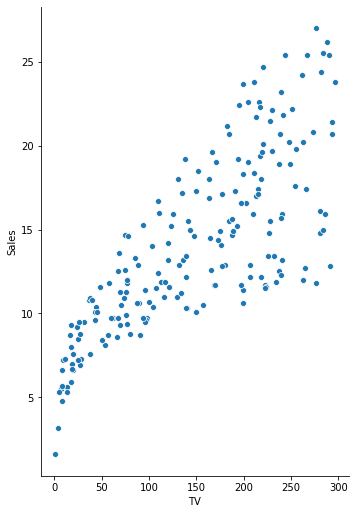

In [8]:
%matplotlib inline
sns.pairplot(data, x_vars=['TV'], y_vars='Sales',size=7, aspect=0.7, kind='scatter')

In [9]:
x = data['TV']
x.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [10]:
y = data['Sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

# Splitting Data into Training and Testing sets

In [11]:
#importing the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.8, random_state=100)

In [12]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [13]:
train_test_split 

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160,)
(160,)
(40,)
(40,)


In [15]:
X_train = x_train[:, np.newaxis]
X_test = x_test[:, np.newaxis]

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 1)
(160,)
(40, 1)
(40,)


# Performing Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

# Creating LinearReegression object
c1r = LinearRegression()

#Fit the model using 1r.fit()

c1r.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Coefficients Values from model

In [18]:
print(c1r.intercept_)
print(c1r.coef_)

7.113008222196275
[0.04610976]


# Prediction using the Model

In [19]:
y_pred = c1r.predict(X_test)

In [20]:
type(y_pred)

numpy.ndarray

In [21]:
print(y_pred)

[ 7.47266432 18.09635222 13.3470473  17.15110221 18.25773636 16.64850586
 13.53148632 16.2242961  17.09115952 17.10960343 12.51707168 17.69519733
  9.70437654 15.77242049 11.13377899 11.45654728 14.01563877 14.96088877
 14.65195341 12.31879973 17.01277294 13.07961071 16.12285464 15.27443512
 15.6387022  17.27098757 17.2479327  10.58507289 15.6387022  12.78911924
 10.26691557 10.29458142 12.69228876 15.80008634  9.41849605 12.66923388
 11.59487655 14.87789121 17.36781806 16.02141317]


Text(0, 0.5, 'Sales')

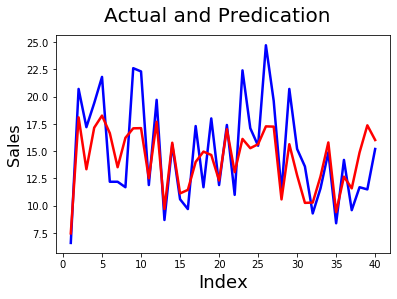

In [26]:
#plot the test data and predition data
c = [i for i in range(1,41,1)]
fig = plt.figure()
plt.plot(c,y_test, color= 'blue', linewidth=2.5, linestyle='-')
plt.plot(c,y_pred, color= 'red', linewidth=2.5, linestyle='-')
fig.suptitle('Actual and Predication', fontsize =20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Sales', fontsize =16)

Text(0, 0.5, 'Sales')

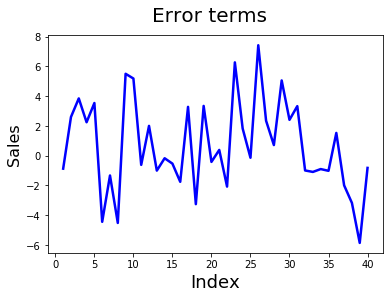

In [27]:
# ploting the error
c = [i for i in range(1,41,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color= 'blue', linewidth=2.5, linestyle='-')
fig.suptitle('Error terms', fontsize =20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Sales', fontsize =16)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [29]:
r_squared = r2_score(y_test, y_pred)

In [30]:
print('Mean_Squared_Error :', mse)
print('r_square_value:', r_squared)

Mean_Squared_Error : 9.687069547890871
r_square_value: 0.5441581483697225


Text(0.5, 0, 'Test')

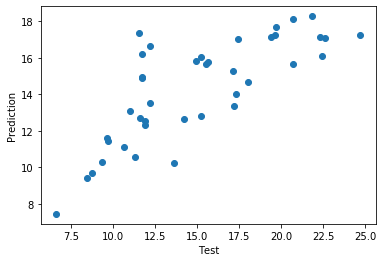

In [31]:
plt.scatter(y_test,y_pred)
plt.ylabel('Prediction')
plt.xlabel('Test')